# Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv', header=12)

In [3]:
filter_1 = data['D (Mpc)'][:1500]

In [4]:
final_data = filter_1[filter_1 < 4]

In [14]:
n = len(final_data)
final_data, n

(27      0.916
 28      0.929
 29      0.951
 30      0.955
 31      0.964
         ...  
 1448    0.863
 1449    0.752
 1450    0.813
 1451    0.700
 1452    0.382
 Name: D (Mpc), Length: 170, dtype: float64,
 170)

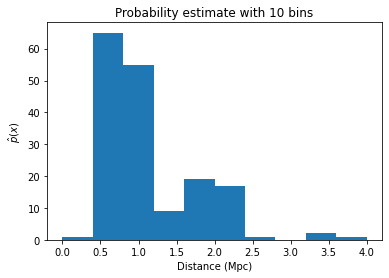

In [34]:
plt.hist(final_data, bins=10, range=(0, 4))
title = r'\hat{p}(x)'
plt.title('Probability estimate with 10 bins')
plt.xlabel('Distance (Mpc)')
plt.ylabel('$%s$'%title)
plt.show()

In [7]:
counts, bins = np.histogram(final_data, bins=10, range=(0, 4))

In [8]:
h = bins[1] - bins[0]

In [15]:
p = counts / (n)

In [16]:
p

array([0.00588235, 0.38235294, 0.32352941, 0.05294118, 0.11176471,
       0.1       , 0.00588235, 0.        , 0.01176471, 0.00588235])

In [22]:
estimator = []
bin_widths = []
for bin_count in range(1, 1001):
    counts, bins = np.histogram(final_data, bins=bin_count, range=(0, 4))
    bin_width = bins[1] - bins[0]
    estimate = (1/(n**2 * bin_width)) * np.sum(counts**2)
    estimate -= (2/(n*(n-1)*bin_width)) * np.sum(counts**2 - counts)
    estimator.append(estimate)
    bin_widths.append(bin_width)

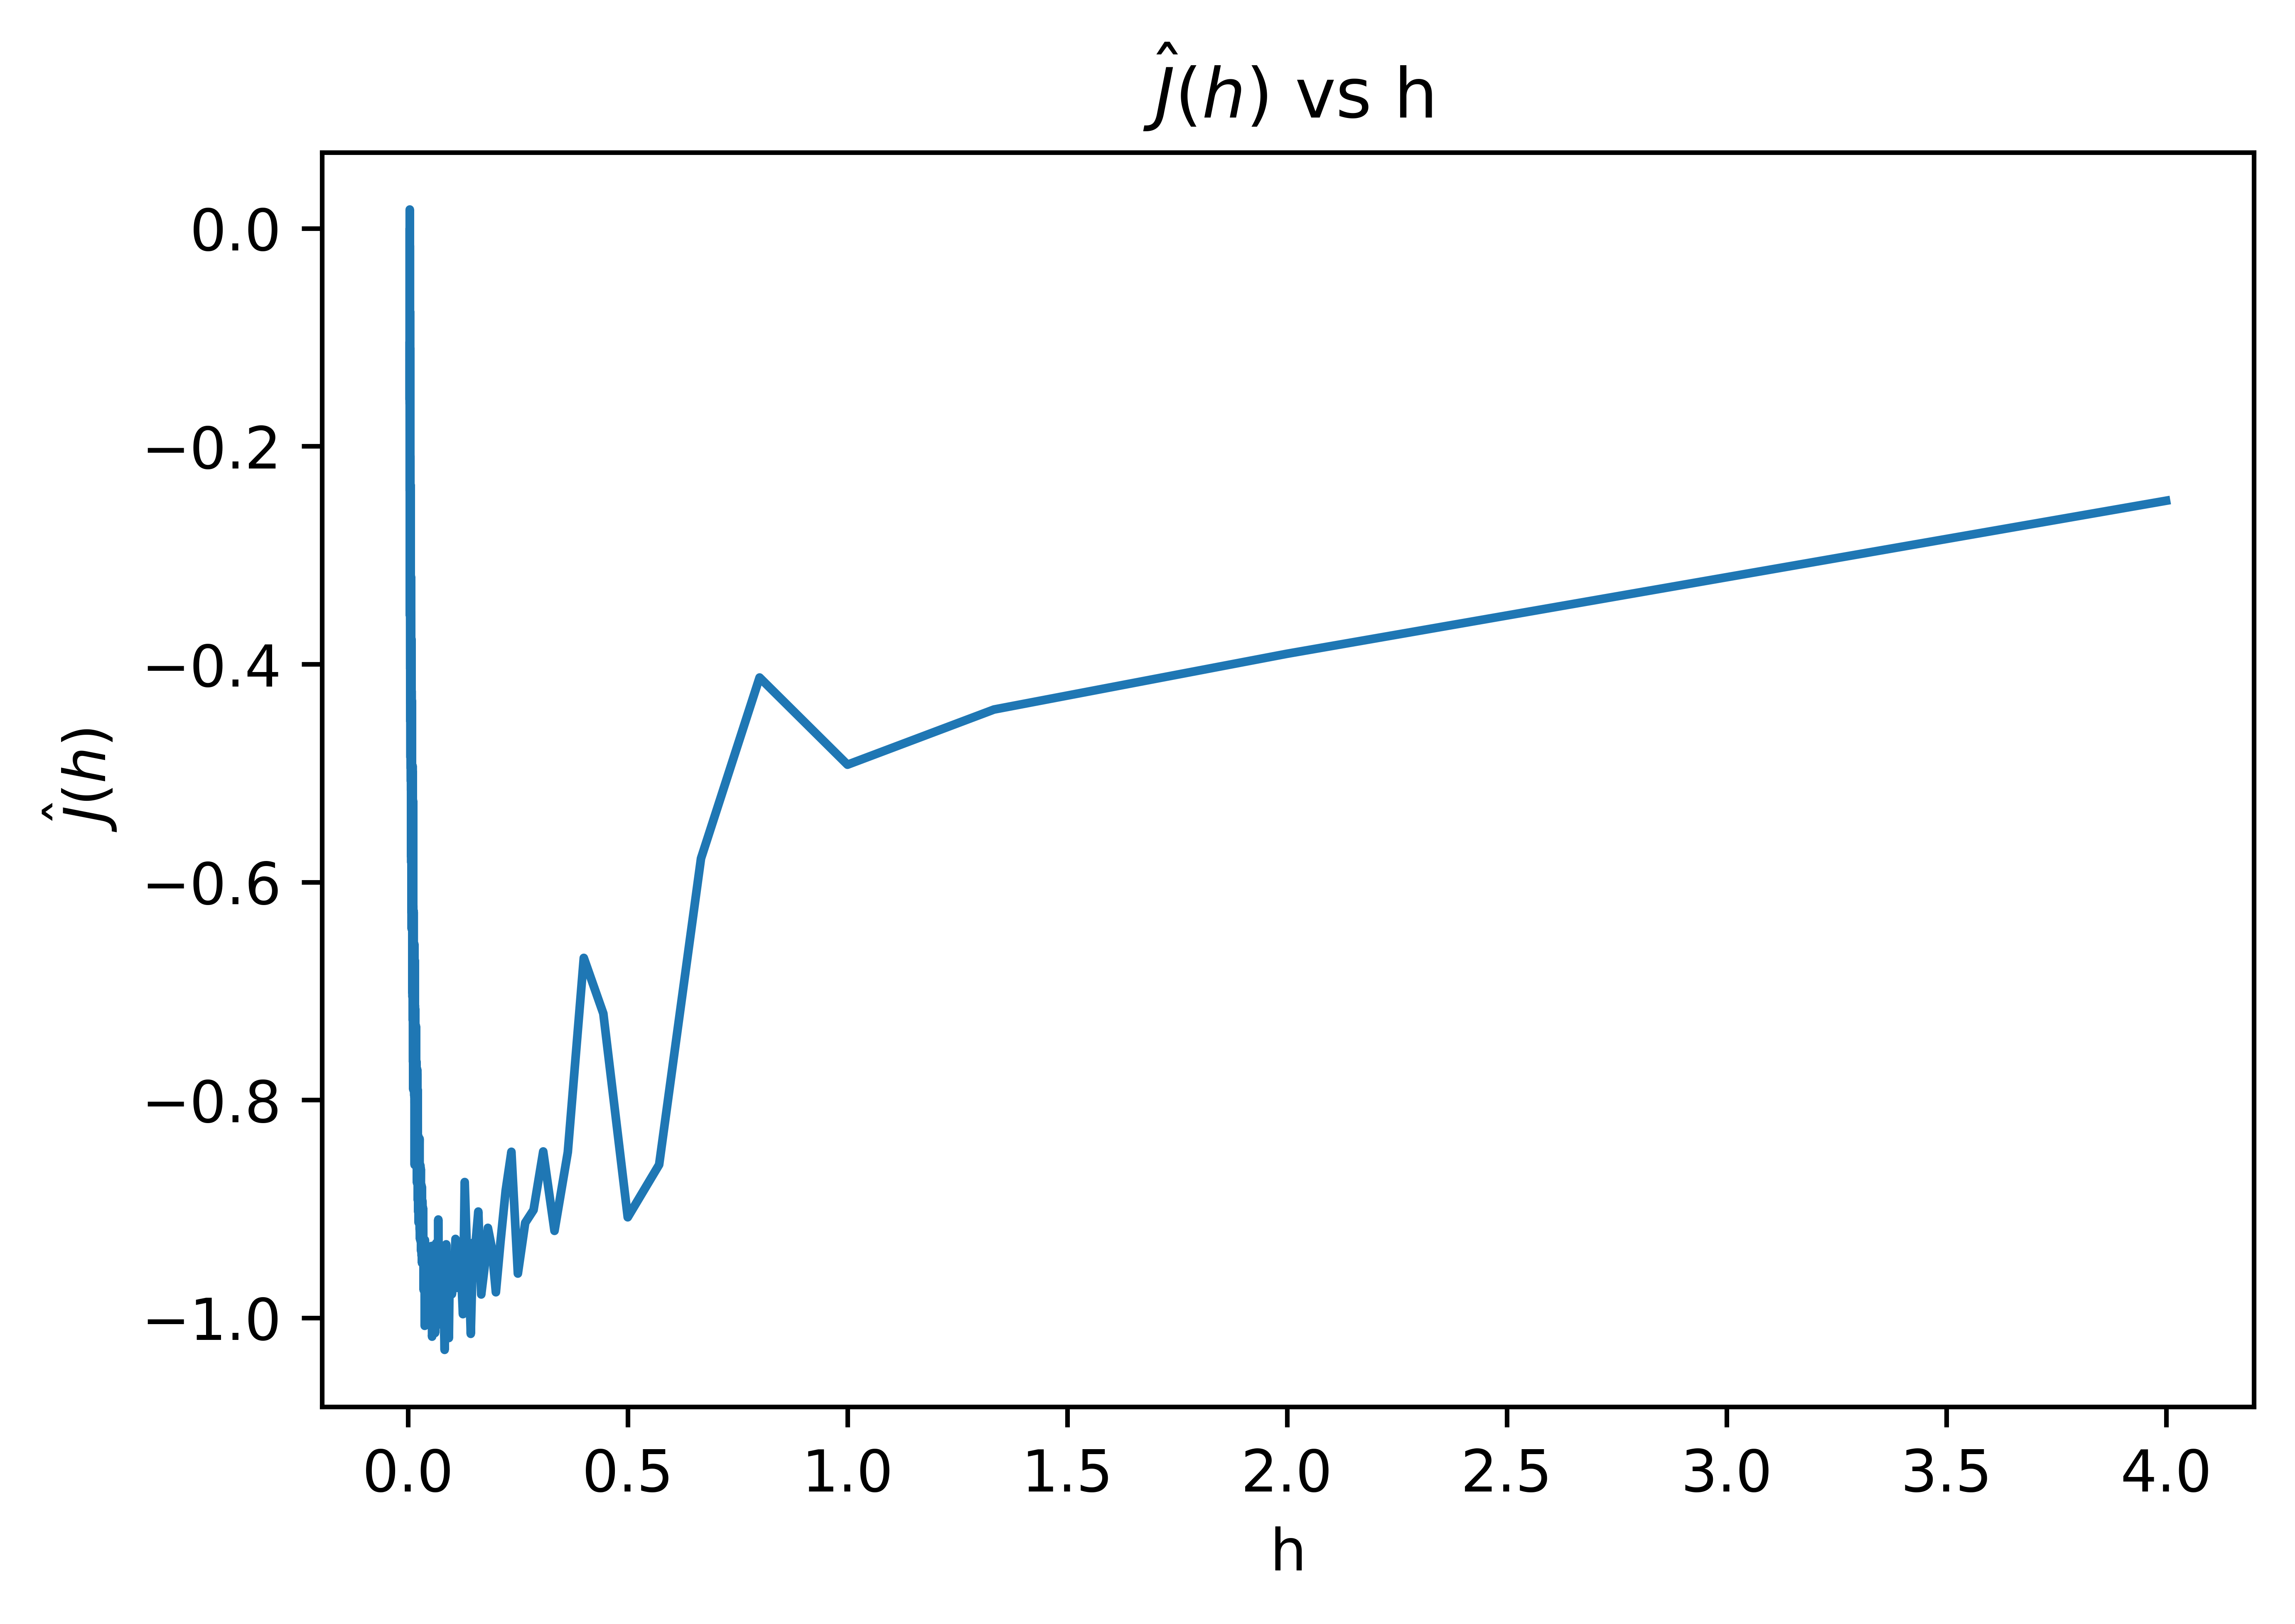

(47, 0.08333333333333333)

In [23]:
plt.figure(dpi=1000)
plt.plot(bin_widths, estimator)
# plt.plot(range(1, 1001), estimator)
title = r'\hat{J}(h)'
plt.title('$%s$'%title + ' vs h')
plt.xlabel('h')
plt.ylabel('$%s$'%title)
plt.show()
np.argmin(estimator), bin_widths[np.argmin(estimator)]

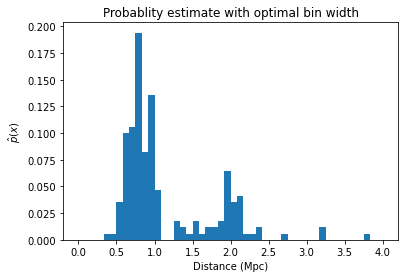

In [32]:
count, bins = np.histogram(final_data, bins=np.argmin(estimator)+1, range=(0, 4))
plt.stairs(count/n, bins, fill=True)
title = r'\hat{p}(x)'
plt.title('Probablity estimate with optimal bin width')
plt.xlabel('Distance (Mpc)')
plt.ylabel('$%s$'%title)
plt.show()

In [18]:
sum = 0
for i in p:
    sum += i
    print(round(i, 3), '&', end=' ')

0.006 & 0.382 & 0.324 & 0.053 & 0.112 & 0.1 & 0.006 & 0.0 & 0.012 & 0.006 & 

In [14]:
bins[1] - bins[0]

0.004

In [19]:
sum

0.9999999999999999

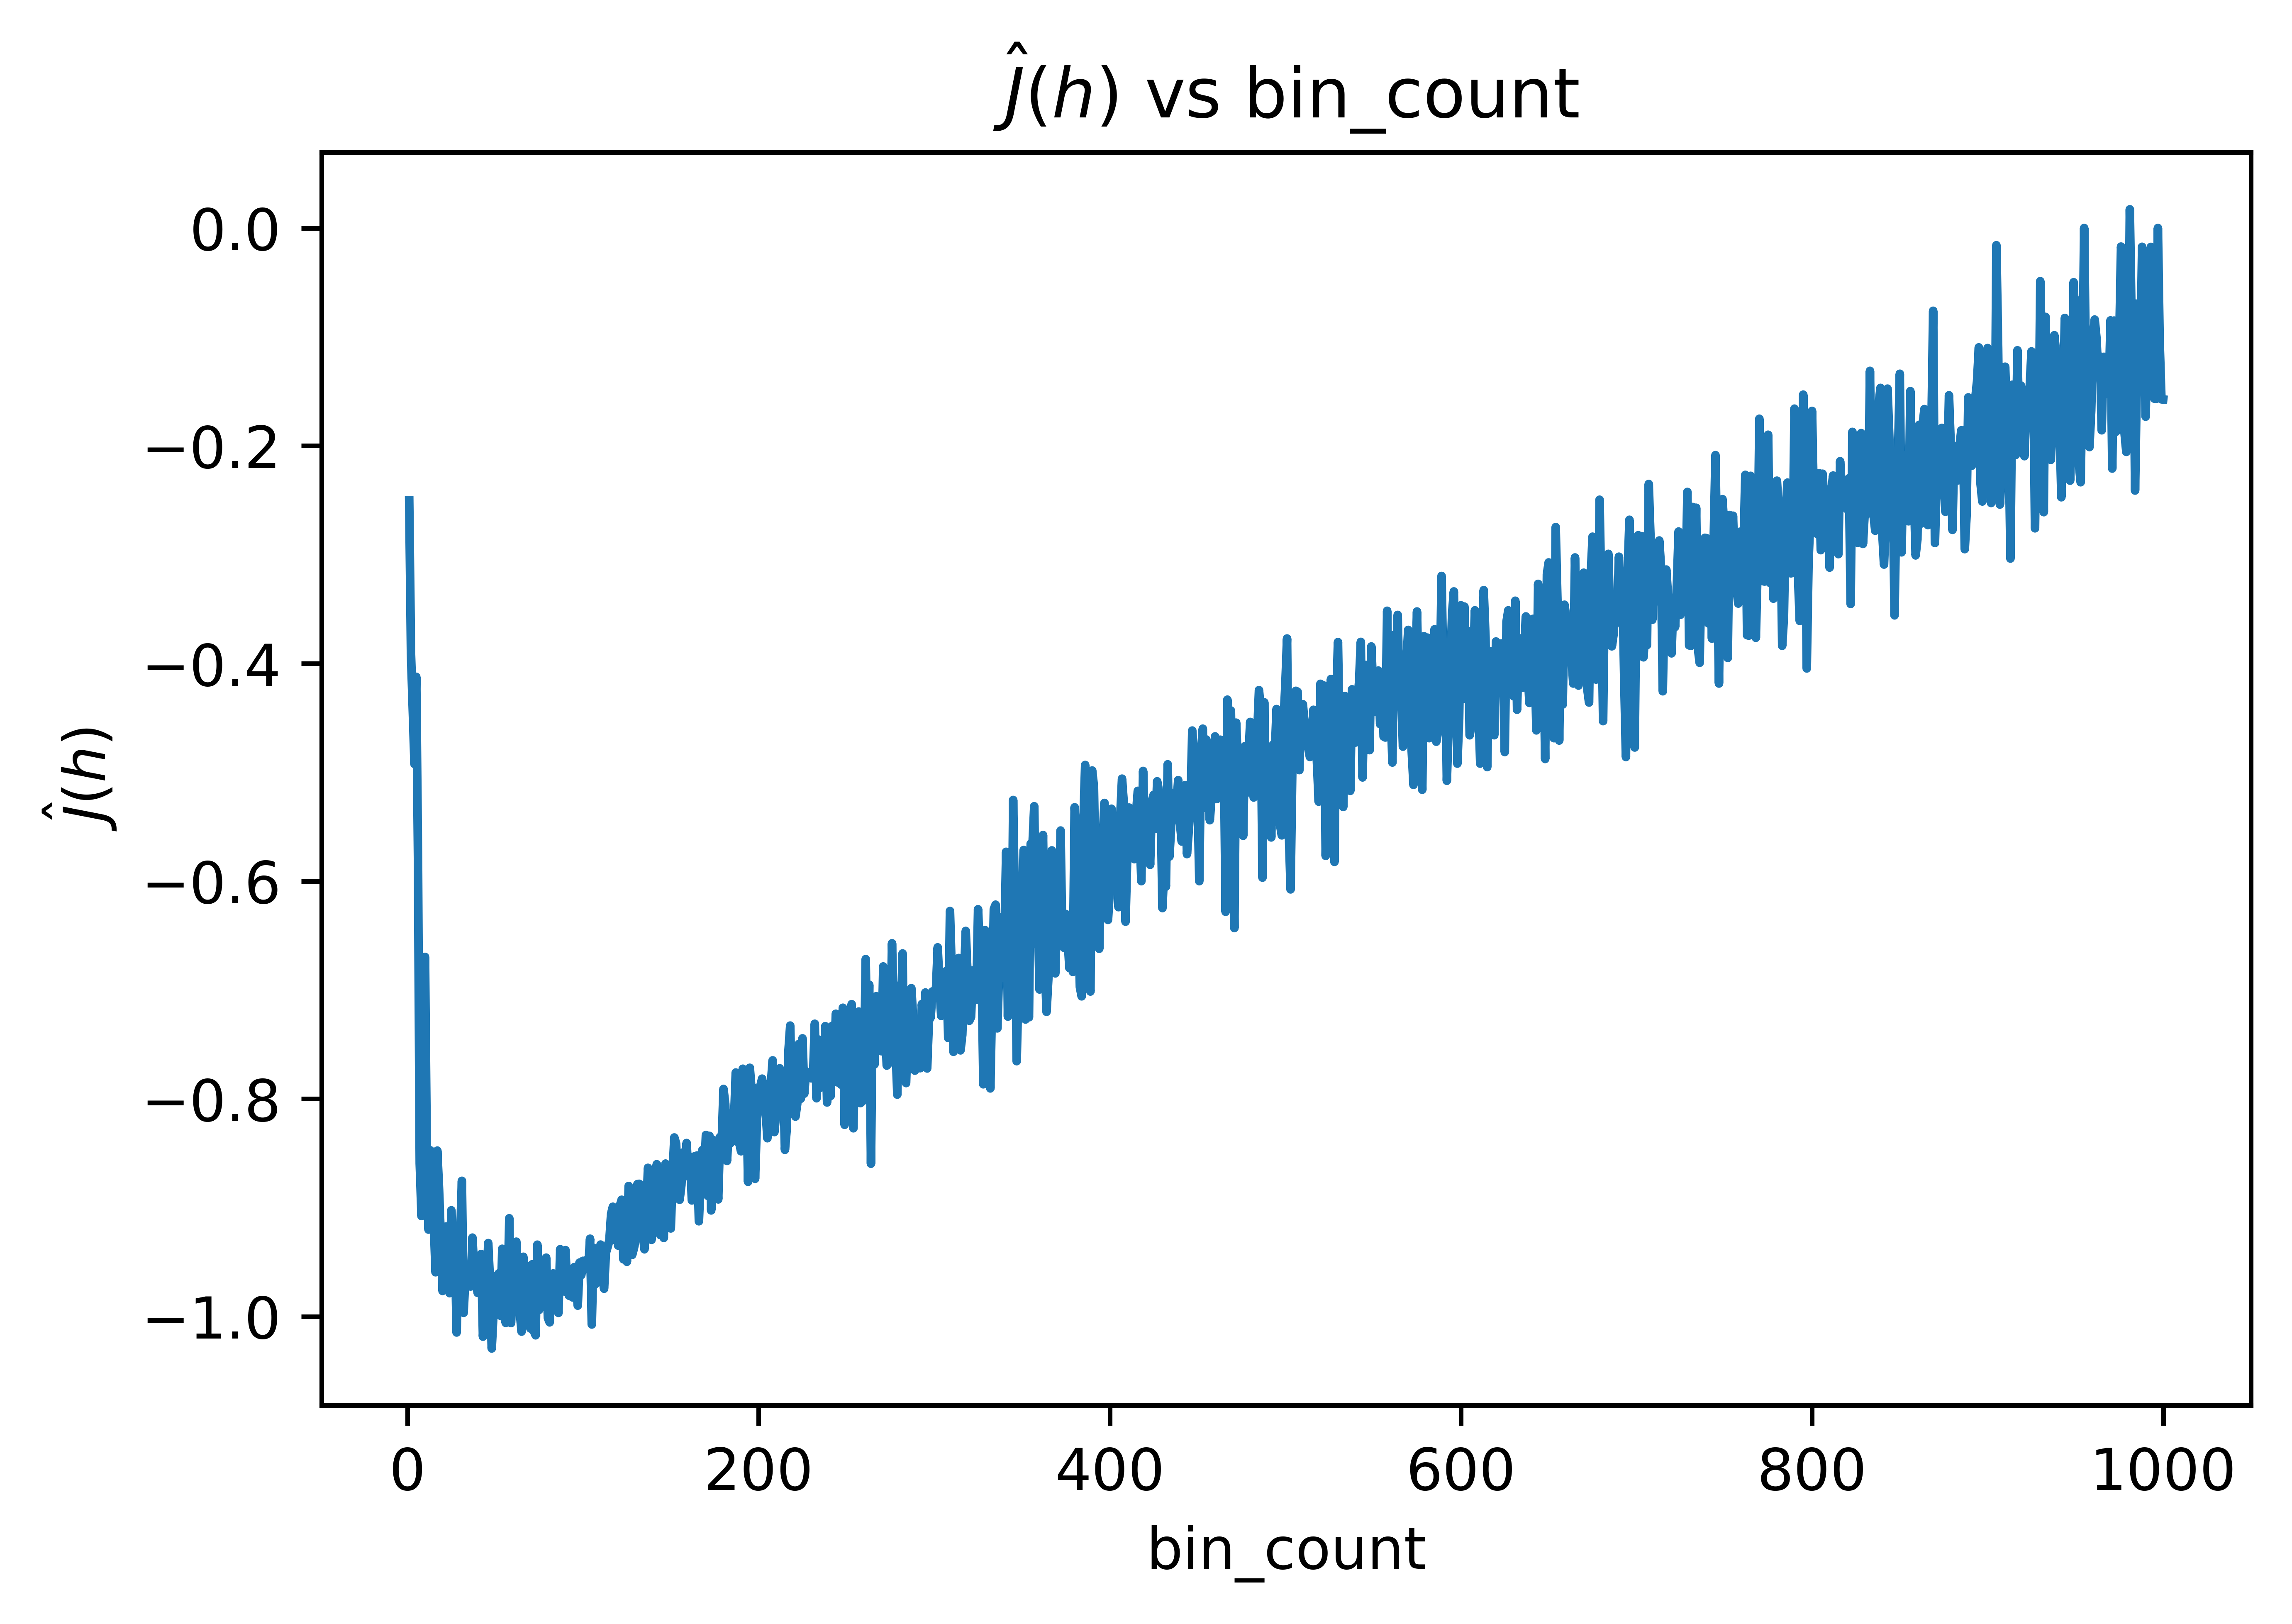

(47, 0.08333333333333333)

In [26]:
plt.figure(dpi=1000)
# plt.plot(bin_count, estimator)
plt.plot(range(1, 1001), estimator)
title = r'\hat{J}(h)'
plt.title('$%s$'%title + ' vs bin_count')
plt.xlabel('bin_count')
plt.ylabel('$%s$'%title)
plt.show()
np.argmin(estimator), bin_widths[np.argmin(estimator)]